## Data Science 101 - Data Analysis on the Iris Dataset
This practical is a guide for exploratory data analysis and simple modeling on the iris dataset (https://www.kaggle.com/datasets/uciml/iris?resource=download). It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. 

We will follow the generic data science workflow to analyse and model the data

In [45]:
# Import required libraries
import pandas as pd #pandas is a python library for data analysis and manipulation
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #sklearn is a python library for machine learning
from sklearn import datasets
import numpy as np
import mpl_toolkits.mplot3d  # noqa: F401

__________________________________________________________________________________________________________________________________________________

## 1. Load Data
The data is stored in a csv file. This is a plain text file where the values are separated by commas. We can load the dataset into a pandas dataframe when we read the file. This imports the data as a kind of table representing all the data in columns and rows. Rows are observations or data entries. Columns are features - measures we use to make predictions.

In [46]:
iris = pd.read_csv("Iris.csv")
iris.drop(["Id"], axis =1, inplace=True) # remove the Id column as it won't be used
iris.head() #show the first five rows of data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Questions - Load Data
1. Is this a supervised or an unsupervised data set if we want to predict the iris species?
2. If we want to build a model to find the iris species, what type of machine learning could we use?
   - a) Regression
   - b) Classification
   - c) Clustering
   - d) B and C
   - e) A and B 

__________________________________________________________________________________________________________________________________________________________________________________
## 2. Data Pre-processing and Data Exploration
Run the code cells below and analyse the outputs to answer the questions.

In [47]:
# What are the different iris species? How many examples are there of each species?
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [48]:
# Summary of the data
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
# Get some more information about the dataset
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


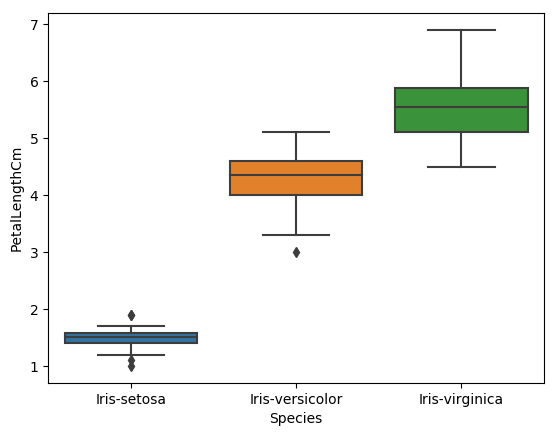

In [50]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

#TODO - try changing the y variable to get the box plots for other features - feature names are case sensitive.

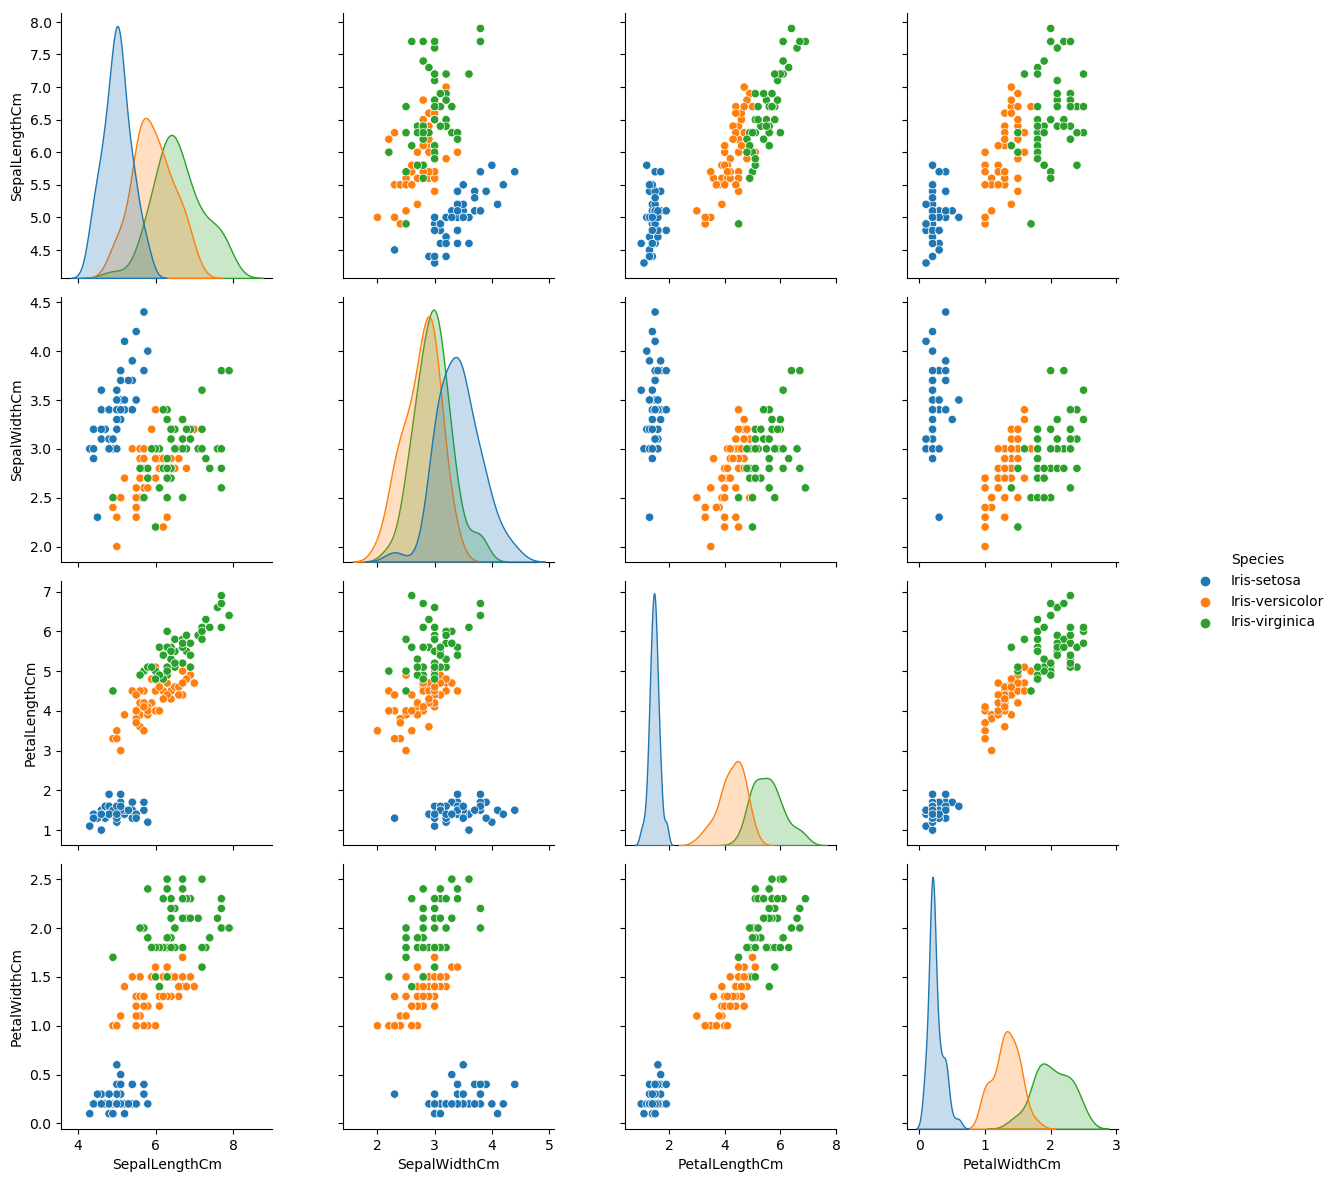

In [51]:
# Another useful seaborn plot is the pairplot, which shows the bivariate (2 variable comparison) relation
# between each pair of features.

sns.pairplot(iris, hue="Species", height=3)

#TODO spend some time discussing these plots

# Questions: Data Preprocessing and Exploration

3. Is the iris dataset balanced? (y/n)
4. How many data points are in the dataset?
5. What is the average petal length across all iris species?
6. Is there any missing data in this dataset?
7. Are there any outliers in the data?
8. From the pairplot, which iris species is separated from the other two across all feature combinations?
9. Looking at this data, what type of machine learning model would you choose to create groups?

__________________________________________________________________________________________________________________________________________
## 3. Data Modeling
We are going to try to group the data into clusters and make classifications for different iris species. We will use the simplest clustering model which is called k-means. It partitions observations into k clusters in which each observation belongs to the cluster with the nearest mean. Therefore, new observations are classified based on how close they are to the mean of each cluster.

In [52]:
np.random.seed(5)

# load the sklearn built in dataset - this has already been preprocessed into the right format for building machine learning models
iris_prepared = datasets.load_iris()
X = iris_prepared.data  # the feature data
y = iris_prepared.target  # the target classes for classification

# get a random sample to test on
test_sample = np.random.choice(150)
x_test = X[test_sample]
y_test = y[test_sample]

# remove the test sample from the "training" dataset
np.delete(X, test_sample)
np.delete(y, test_sample)


model = KMeans(n_clusters=3, max_iter=10)
model.fit(X) # fit the model
labels = model.labels_ 


_________________________________________________________________________________________________________________________________________
## 4. Evaluation and Visualisation
Run the code below. There are 2 plots that will be created
- A 3d scatter plot showing the 3 predicted clusters (for petal length, petal width and sepal length)
- The same plot but with the data points coloured with the ground truth - the actual labels

In [59]:
# Evaluate on the test datapoint
y_pred = model.predict([x_test])
y_pred 

# the result is cluster 2 - if we look at the ground truth plot, cluster 2 is the species Virginica 

array([2])

In [60]:
# What is the actual value though?
iris.loc[test_sample] #find the same index in the original dataset and look at the y value

SepalLengthCm                5.7
SepalWidthCm                 2.8
PetalLengthCm                4.1
PetalWidthCm                 1.3
Species          Iris-versicolor
Name: 99, dtype: object

c:\Users\danielle.winter\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


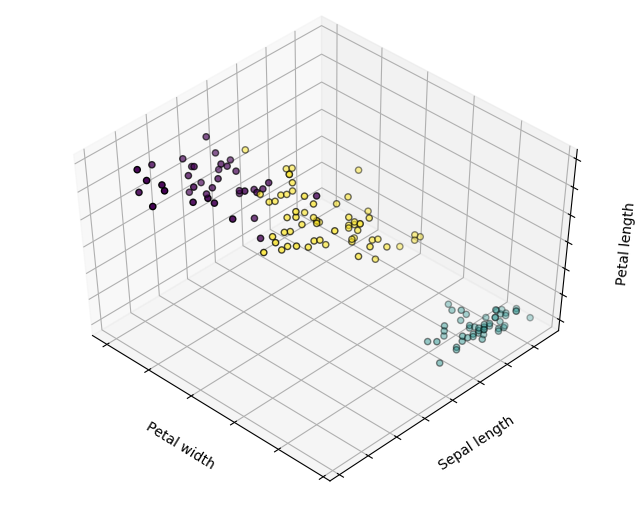

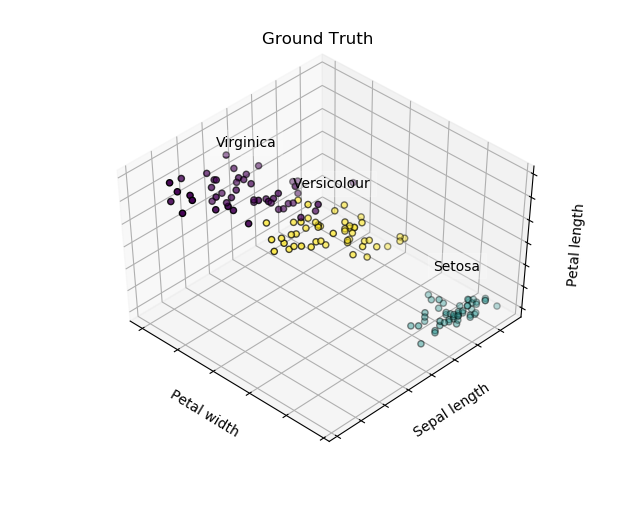

In [36]:
# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")

# Plot the ground truth
truth_fig = plt.figure()
ax1 = truth_fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax1.set_position([0, 0, 0.95, 1])

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax1.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax1.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax1.w_xaxis.set_ticklabels([])
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])
ax1.set_xlabel("Petal width")
ax1.set_ylabel("Sepal length")
ax1.set_zlabel("Petal length")
ax1.set_title("Ground Truth")
ax1.dist = 12

truth_fig.show()

# Questions: Modeling, Evaluation and Visualisation
10. For the test sample, is the predicted species correct? 
11. From the graphs, are the predicted clusters the same as the ground truth?